**2. Exploring and Preparing Data: Wrangling and Feature Engineering 🧹**


This notebook is the critical transition point where the raw, merged dataset (spacex_raw_data.csv) is transformed into a clean, model-ready format. The primary goal is to address data quality issues (missing values, messy text) and engineer the binary target variable (Class) required for the reusability prediction model.

**Goal and Strategy**
Our strategy is to maximize the utility of the collected data by systematically:

**Handling Missing Values:** italicized text Using domain-specific knowledge to impute missing PayloadMass and LaunchSite data.

**Feature Standardization:** Normalizing inconsistent categorical values (e.g., in Landing_Outcome).

**Target Creation:** Defining the clear, binary variable for the prediction model.

**🗑️ Phase 1:** Cleaning and Missing Value Imputation
The raw data contains null values and inconsistent textual entries that must be resolved to prevent errors and biases in the downstream analysis (SQL and ML).

**Handling Numerical Nulls**
Strategy: **bold text** Columns like PayloadMass cannot simply be dropped, as payload is a strong predictor of success. We utilize mean imputation—replacing null values with the column's average—as the safest method to retain these mission records without introducing external bias.

Target: PayloadMass, Booster_Version, etc.

**Resolving Categorical Inconsistencies** Strategy: The Landing_Outcome column is crucial for creating our target variable but contains multiple variations of 'Success' (e.g., 'Success (drone ship)', 'Success (ground pad)'). We use string manipulation to consolidate these into standardized categories before binarization.

**🎯 Phase 2: Target Variable Creation (The 'Class' Feature)**
The core objective of the entire project is predicting successful booster reuse. Therefore, we must convert the multi-valued Landing_Outcome column into a simple binary target variable, Class.

The Landing_Outcome categories are consolidated into a binary target variable called Class. Any variation of a successful recovery outcome is assigned a Class value of 1, representing a successful recovery of the first stage. Conversely, any mission that resulted in failure or was not intended for recovery is assigned a Class value of 0. This binarization is essential for preparing the data for the binary classification prediction model.

**⚙️ Phase 3:** Feature Engineering and Final Checkpoint
Before final output, we engineer several features important for the model:

**Feature:** No. of Flights
We process the booster serial numbers to count how many times each specific booster has flown. This count is a powerful proxy for booster reliability and component wear and is a critical input feature for prediction.

**Final Data Validation**
After cleaning and engineering, we perform a final data check (df.info(), df.describe()) to ensure all features are in the correct data type (numerical, categorical) and that no significant missing values remain.

**✅ Conclusion:** Model-Ready Data
This notebook successfully completed all necessary data wrangling and feature engineering tasks.

The resulting clean dataset, now saved as spacex_clean_data.csv, is ready for:

SQL Analysis (Notebook 3): To extract strategic business intelligence and trends.

Visualizations (Notebooks 4 & 5): To confirm feature relationships visually.

Machine Learning (Notebook 6): As the final, trustworthy input for the prediction models.

In [ ]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Import NumPy for numerical operations and handling multi-dimensional arrays
import numpy as np

# Import Matplotlib's pyplot for creating plots and visualizations
import matplotlib.pyplot as plt

# Import Seaborn for statistical data visualization with an easier and prettier interface
import seaborn as sns

# Import requests for sending HTTP requests to fetch data from APIs
import requests

# Import io for handling input/output operations, especially for in-memory streams
import io

### Import Libraries

This cell imports the necessary Python libraries for data manipulation, analysis, and visualization.

- `pandas`: Used for creating and manipulating DataFrames.
- `numpy`: Used for numerical operations.
- `matplotlib.pyplot`: Used for creating plots.
- `seaborn`: Used for creating statistical visualizations.
- `requests`: Used for fetching data from URLs.
- `io`: Used for working with in-memory file-like objects.

In [ ]:
# Define the URL of the dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
# Send an HTTP GET request to the URL
resp = requests.get(URL)
# Read the content of the response into a BytesIO object
dataset_part_2_csv = io.BytesIO(resp.content)
# Read the CSV data from the BytesIO object into a pandas DataFrame
df=pd.read_csv(dataset_part_2_csv)
# Display the first 5 rows of the DataFrame
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


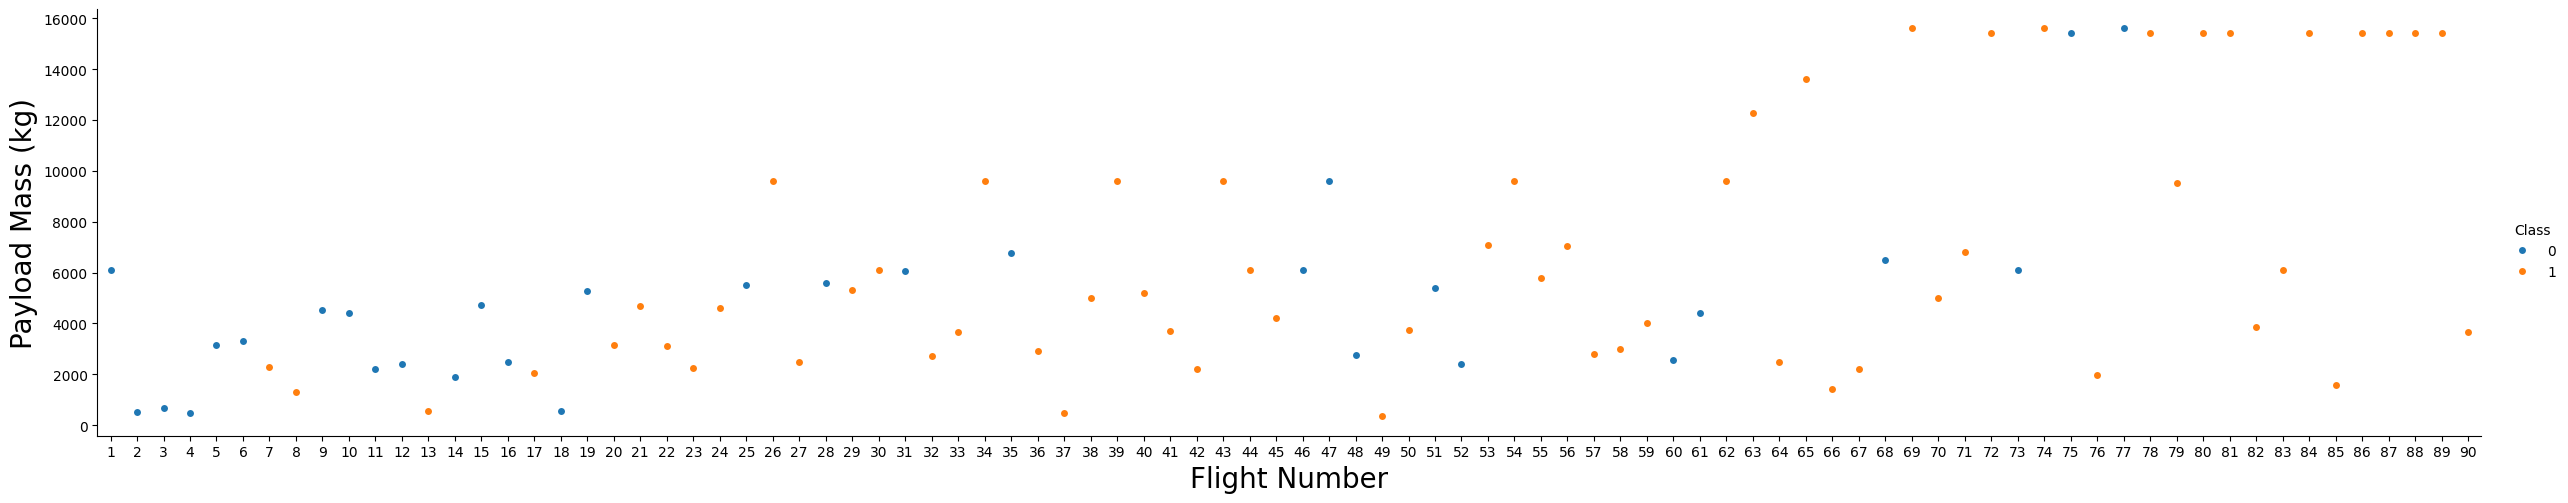

In [ ]:
# Create a categorical plot to visualize the relationship between Flight Number and Payload Mass
# The 'hue' parameter differentiates the points by the 'Class' variable (e.g., success or failure)
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect=5)

# Set x-axis label with larger font size
plt.xlabel("Flight Number", fontsize=20)

# Set y-axis label with larger font size
plt.ylabel("Payload Mass (kg)", fontsize=20)

# Display the plot
plt.show()

### Relationship between Flight Number and Payload Mass

This cell generates a scatter plot using `seaborn.catplot` to visualize the relationship between Flight Number and Payload Mass, with points colored based on the `Class` (success or failure) of the launch.

- **`y="PayloadMass"`**: Sets the Payload Mass on the y-axis.
- **`x="FlightNumber"`**: Sets the Flight Number on the x-axis.
- **`hue="Class"`**: Colors the points based on the `Class` column, differentiating between successful (1) and failed (0) launches.
- **`data=df`**: Specifies the DataFrame to use.
- **`aspect=5`**: Controls the aspect ratio of the plot to make it wider.
- **`plt.xlabel(...)`, `plt.ylabel(...)`**: Sets the labels for the x and y axes with a larger font size.
- **`plt.show()`**: Displays the generated plot.

**Results and Insights:**

The plot shows that as the flight number increases, there is a trend towards higher payload masses. Additionally, later flights (higher flight numbers) and those with higher payload masses appear to have a higher success rate (indicated by the prevalence of the '1' class). This suggests that both flight experience and the ability to handle larger payloads are correlated with successful launches.

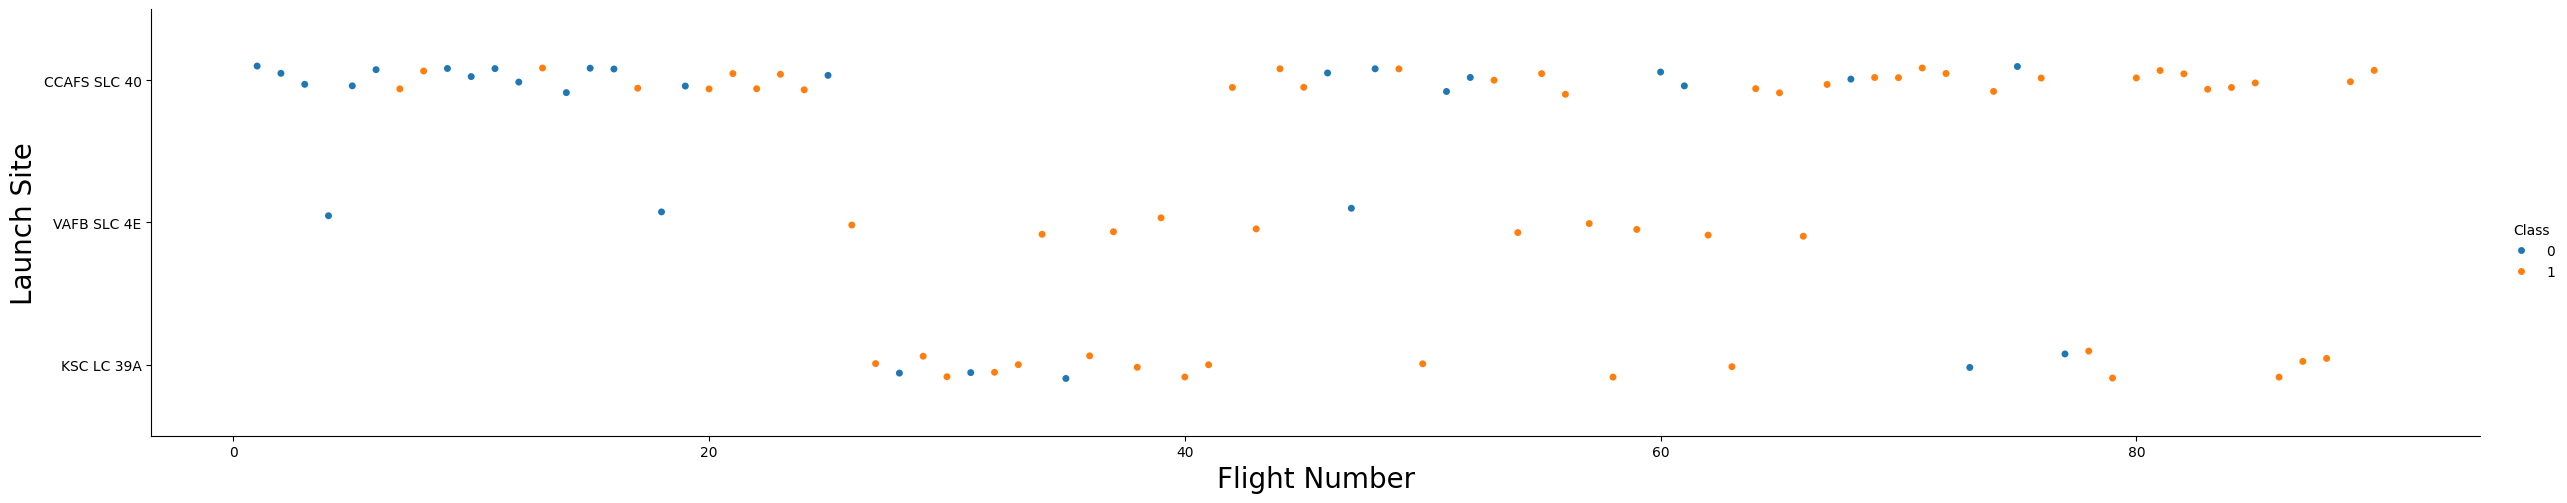

In [ ]:
# Create a categorical plot to visualize the relationship between Flight Number and Launch Site
# The 'hue' parameter shows the outcome class (success or failure) for each launch
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect=5)

# Set x-axis label with larger font size
plt.xlabel("Flight Number", fontsize=20)

# Set y-axis label with larger font size
plt.ylabel("Launch Site", fontsize=20)

# Display the plot
plt.show()


### Relationship between Flight Number and Launch Site

This cell generates a scatter plot using `seaborn.catplot` to visualize the relationship between Flight Number and Launch Site, with points colored based on the `Class` (success or failure) of the launch.

- **`y="LaunchSite"`**: Sets the Launch Site on the y-axis.
- **`x="FlightNumber"`**: Sets the Flight Number on the x-axis.
- **`hue="Class"`**: Colors the points based on the `Class` column, differentiating between successful (1) and failed (0) launches.
- **`data=df`**: Specifies the DataFrame to use.
- **`aspect=5`**: Controls the aspect ratio of the plot to make it wider.
- **`plt.xlabel(...)`, `plt.ylabel(...)`**: Sets the labels for the x and y axes with a larger font size.
- **`plt.show()`**: Displays the generated plot.

**Results and Insights:**

The plot shows the distribution of launches across different launch sites over time (represented by Flight Number). It's evident that the CCAFS SLC 40 site has been used for a large number of early flights, while VAFB SLC 4E and KSC LC 39A were introduced later. The plot also indicates that success rates vary by launch site, with KSC LC 39A showing a high success rate across its flights. This suggests that the launch site might be a factor influencing the success of a mission.

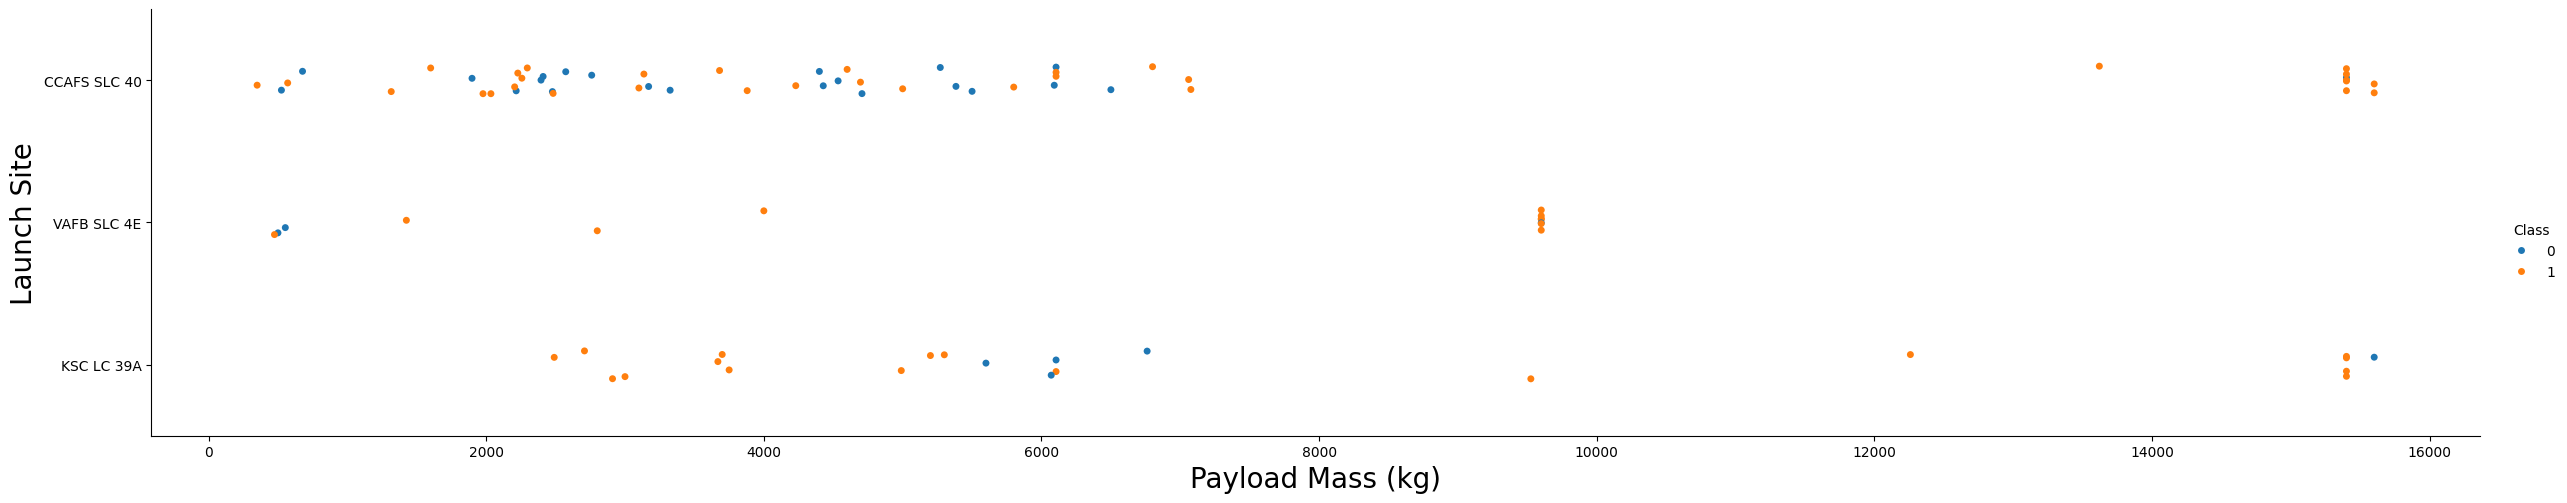

In [ ]:
# Create a scatter/categorical plot to visualize how Payload Mass varies across Launch Sites
# 'hue' differentiates the launch outcome class (success or failure)
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect=5)

# Set x-axis label with larger font size
plt.xlabel("Payload Mass (kg)", fontsize=20)

# Set y-axis label with larger font size
plt.ylabel("Launch Site", fontsize=20)

# Display the plot
plt.show()

### Relationship between Payload Mass and Launch Site

This cell generates a scatter plot using `seaborn.catplot` to visualize the relationship between Payload Mass and Launch Site, with points colored based on the `Class` (success or failure) of the launch.

- **`y="LaunchSite"`**: Sets the Launch Site on the y-axis.
- **`x="PayloadMass"`**: Sets the Payload Mass on the x-axis.
- **`hue="Class"`**: Colors the points based on the `Class` column, differentiating between successful (1) and failed (0) launches.
- **`data=df`**: Specifies the DataFrame to use.
- **`aspect=5`**: Controls the aspect ratio of the plot to make it wider.
- **`plt.xlabel(...)`, `plt.ylabel(...)`**: Sets the labels for the x and y axes with a larger font size.
- **`plt.show()`**: Displays the generated plot.

**Results and Insights:**

The plot shows how payload mass is distributed across different launch sites and how this relates to launch success. It appears that all launch sites have handled a range of payload masses. However, successful launches (Class 1) at CCAFS SLC 40 and KSC LC 39A seem to occur across a wider range of payload masses compared to VAFB SLC 4E, where successful launches are clustered at lower payload masses. This suggests that while payload mass is a factor, the launch site also plays a role in the success of a mission, potentially due to differences in infrastructure or environmental conditions.

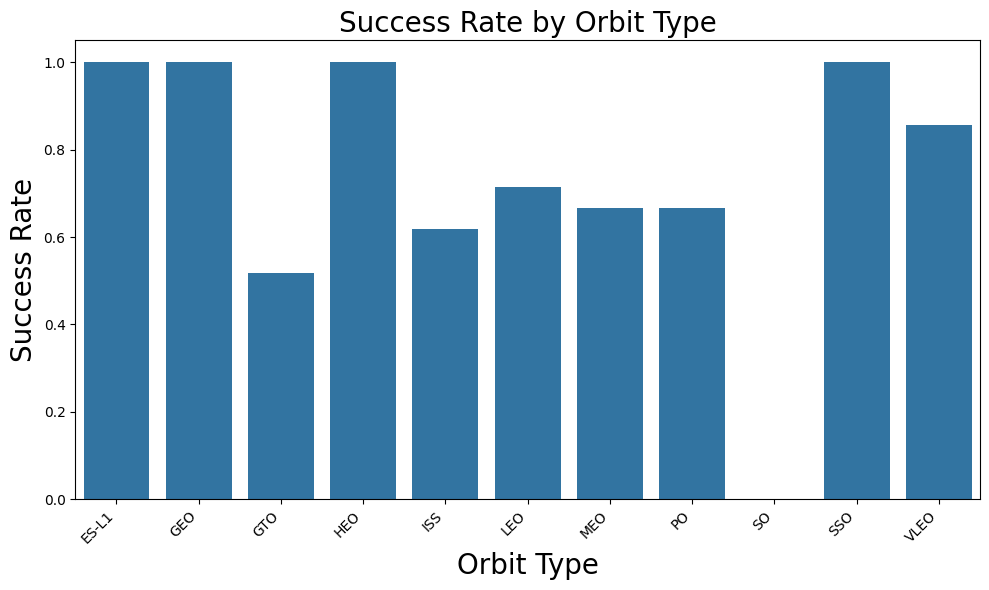

In [ ]:
# Calculate the mean success rate for each Orbit type using groupby on 'Orbit' and mean of 'Class'
orbit_success_rate = df.groupby('Orbit')['Class'].mean()

# Create a figure with specific size
plt.figure(figsize=(10, 6))

# Plot a bar chart with Orbit types on x-axis and their corresponding success rates on y-axis
sns.barplot(x=orbit_success_rate.index, y=orbit_success_rate.values)

# Set x-axis label with larger font size
plt.xlabel("Orbit Type", fontsize=20)

# Set y-axis label with larger font size
plt.ylabel("Success Rate", fontsize=20)

# Set plot title with larger font size
plt.title("Success Rate by Orbit Type", fontsize=20)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

### Success Rate by Orbit Type

This cell calculates and visualizes the success rate for each orbit type.

1. **Calculate Success Rate:** Groups the DataFrame by 'Orbit' and calculates the mean of the 'Class' column to get the success rate for each orbit.
2. **Create Figure:** Sets up a figure for the plot with a specified size.
3. **Create Bar Plot:** Generates a bar chart with orbit types on the x-axis and their corresponding success rates on the y-axis.
4. **Set Labels and Title:** Sets the labels for the x and y axes and the title of the plot with larger font sizes.
5. **Rotate x-axis labels:** Rotates the x-axis labels to improve readability.
6. **Adjust Layout:** Adjusts the plot layout to prevent labels from overlapping.
7. **Display Plot:** Shows the generated plot.

**Results and Insights:**

The bar chart shows the average success rate for each type of orbit. Some orbits, like ES-L1, GEO, and HEO, have a 100% success rate, although the number of launches to these orbits might be small. Other orbits, such as GTO, ISS, LEO, MEO, PO, and VLEO, show varying success rates. The SO orbit has a 0% success rate. This visualization helps identify which orbits are associated with higher or lower success probabilities, suggesting that orbit type is a significant factor in determining launch success.

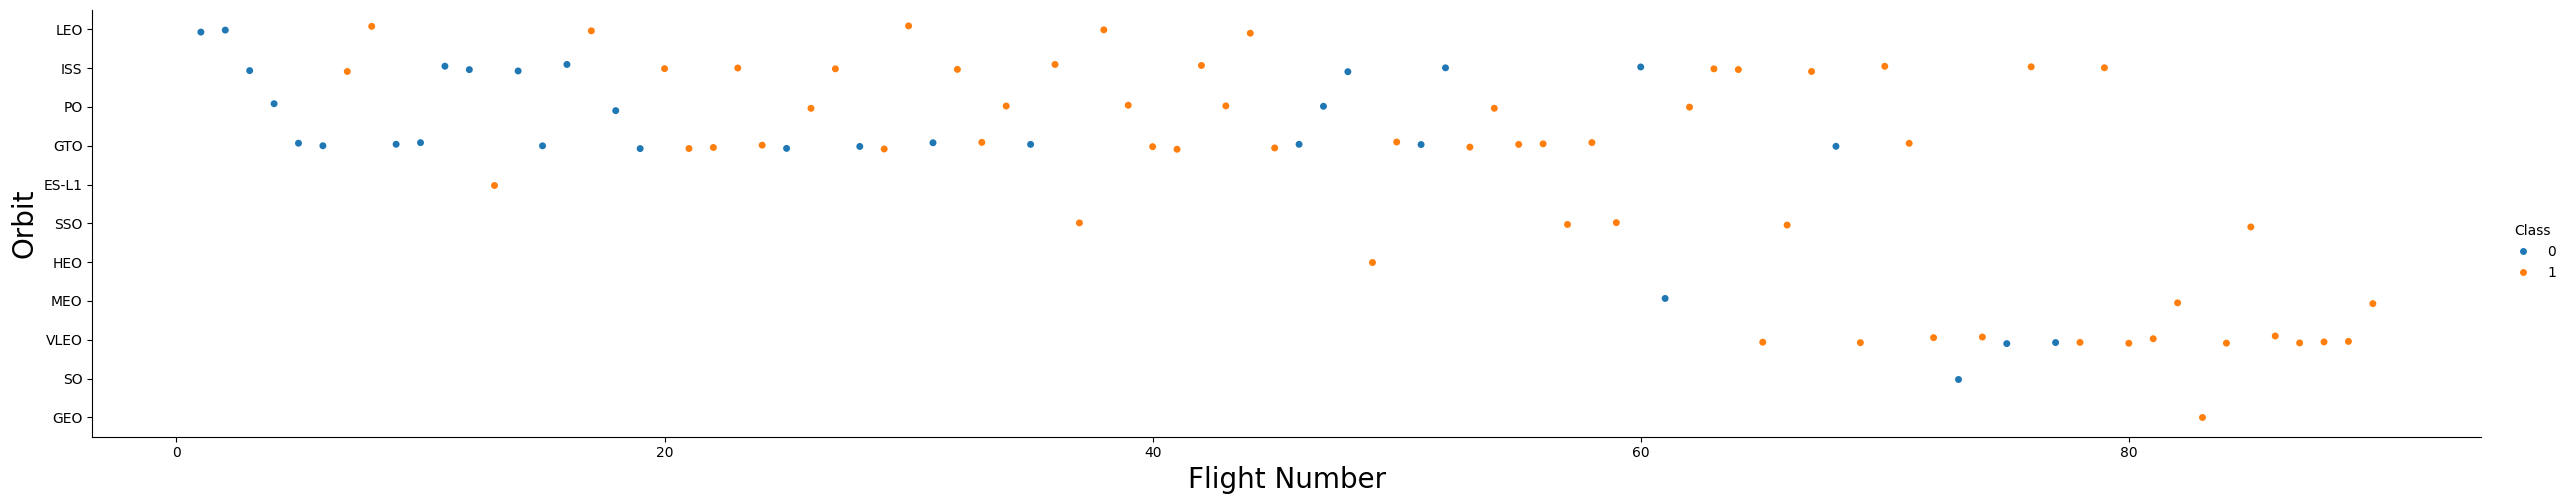

In [ ]:
# Create a scatter/categorical plot to visualize the relationship between Flight Number and Orbit type
# The 'hue' parameter differentiates the launch outcome class (success or failure)
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect=5)

# Set x-axis label with larger font size
plt.xlabel("Flight Number", fontsize=20)

# Set y-axis label with larger font size
plt.ylabel("Orbit", fontsize=20)

# Display the plot
plt.show()

### Relationship between Flight Number and Orbit Type

This cell generates a scatter plot using `seaborn.catplot` to visualize the relationship between Flight Number and Orbit type, with points colored based on the `Class` (success or failure) of the launch.

- **`y="Orbit"`**: Sets the Orbit type on the y-axis.
- **`x="FlightNumber"`**: Sets the Flight Number on the x-axis.
- **`hue="Class"`**: Colors the points based on the `Class` column, differentiating between successful (1) and failed (0) launches.
- **`data=df`**: Specifies the DataFrame to use.
- **`aspect=5`**: Controls the aspect ratio of the plot to make it wider.
- **`plt.xlabel(...)`, `plt.ylabel(...)`**: Sets the labels for the x and y axes with a larger font size.
- **`plt.show()`**: Displays the generated plot.

**Results and Insights:**

The plot illustrates how different orbits are targeted over the sequence of flights. It shows that some orbits, like LEO, ISS, and GTO, have been consistently targeted across many flights, while others, like SSO, MEO, VLEO, ES-L1, HEO, GEO, and SO, have been targeted in later flights or less frequently. The distribution of successful and failed launches across flight numbers for each orbit provides insights into the reliability of reaching specific orbits over time. For example, while early flights to LEO and ISS had mixed results, later flights to VLEO, MEO, and SSO show a higher success rate. This suggests that as SpaceX's experience and technology have advanced, they have become more successful at reaching a wider variety of orbits.

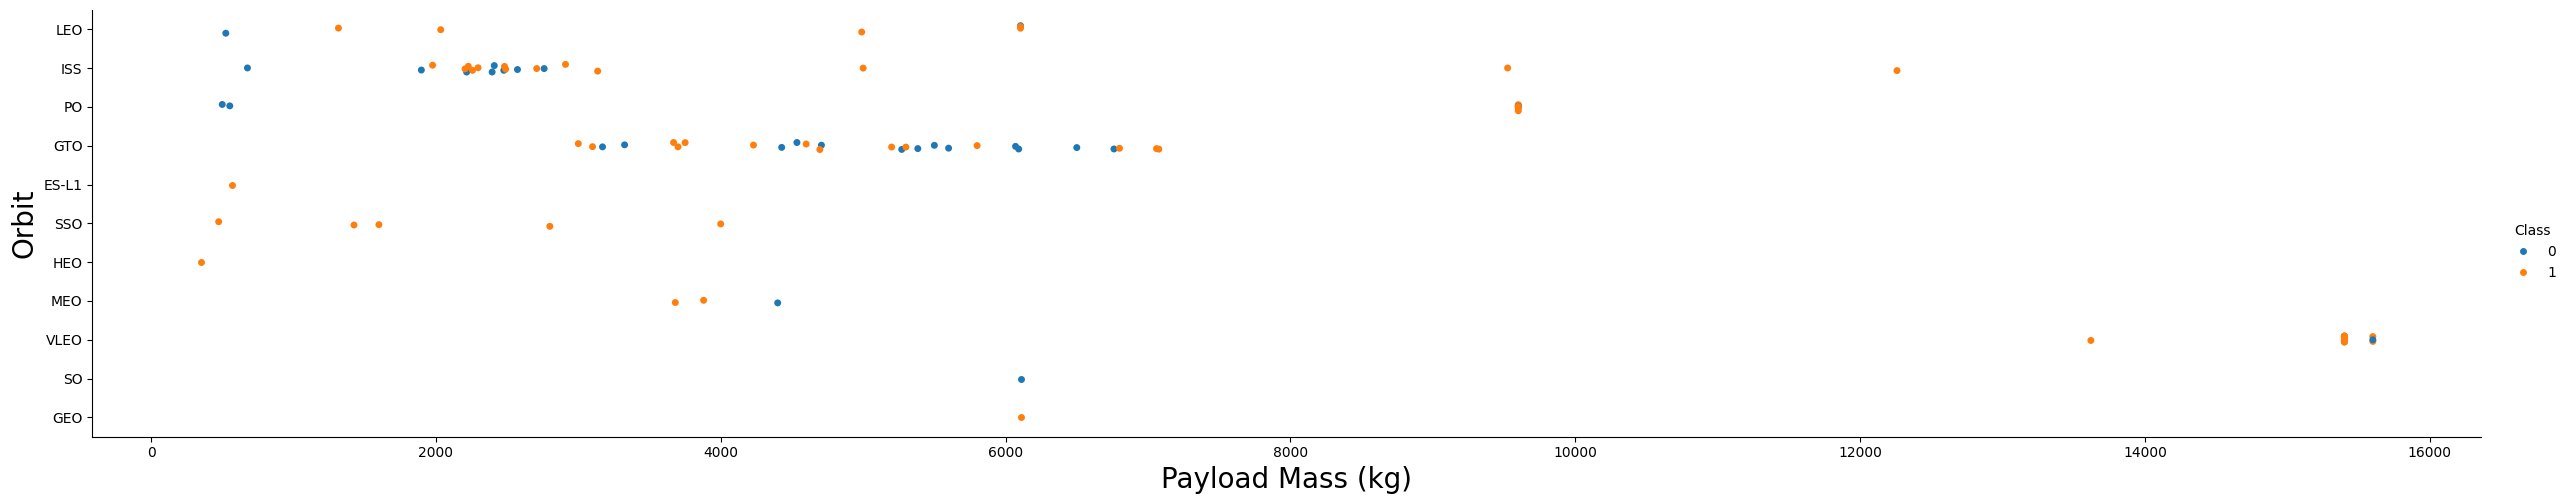

In [ ]:
# Create a scatter/categorical plot to visualize how Payload Mass varies across different Orbit types
# The 'hue' parameter distinguishes between successful and failed launches
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect=5)

# Set x-axis label with larger font size
plt.xlabel("Payload Mass (kg)", fontsize=20)

# Set y-axis label with larger font size
plt.ylabel("Orbit", fontsize=20)

# Display the plot
plt.show()

### Relationship between Payload Mass and Orbit Type

This cell generates a scatter plot using `seaborn.catplot` to visualize how Payload Mass varies across different Orbit types, with points colored based on the `Class` (success or failure) of the launch.

- **`y="Orbit"`**: Sets the Orbit type on the y-axis.
- **`x="PayloadMass"`**: Sets the Payload Mass on the x-axis.
- **`hue="Class"`**: Colors the points based on the `Class` column, differentiating between successful (1) and failed (0) launches.
- **`data=df`**: Specifies the DataFrame to use.
- **`aspect=5`**: Controls the aspect ratio of the plot to make it wider.
- **`plt.xlabel(...)`, `plt.ylabel(...)`**: Sets the labels for the x and y axes with a larger font size.
- **`plt.show()`**: Displays the generated plot.

**Results and Insights:**

The plot shows the distribution of payload masses for different orbit types and how they relate to launch success. It appears that certain orbits are associated with specific ranges of payload masses. For example, GTO and VLEO orbits seem to accommodate higher payload masses compared to others like LEO or ISS. The plot also indicates that successful launches (Class 1) occur across a range of payload masses within each orbit type, but there might be a higher concentration of successful launches at certain payload mass ranges depending on the orbit. This further reinforces that both payload mass and orbit type are important factors influencing launch success.

In [ ]:
# Initialize an empty list to store years
year = []

# Define a function to extract the year from the 'Date' column of the DataFrame
def Extract_year():
    # Loop through each date string in the 'Date' column
    for i in df["Date"]:
        # Split the date string by '-' and take the first part as the year
        year.append(i.split("-")[0])
    # Return the list of extracted years
    return year

# Call the function to populate the 'year' list
Extract_year()

# Replace the 'Date' column in the DataFrame with the extracted years
df['Date'] = year

# Display the first few rows to verify the changes
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


### Extract Year from Date

This cell extracts the year from the 'Date' column and updates the DataFrame with the year.

1. **Initialize List:** An empty list `year` is created to store the extracted years.
2. **Define Function:** A function `Extract_year()` is defined to iterate through the 'Date' column.
3. **Extract Year:** Inside the function, each date string is split by '-' and the first element (the year) is appended to the `year` list.
4. **Call Function:** The `Extract_year()` function is called to populate the `year` list.
5. **Update DataFrame:** The original 'Date' column in the DataFrame is replaced with the `year` list.
6. **Display Head:** The first few rows of the modified DataFrame are displayed to verify the change.

**Results and Insights:**

The output shows the DataFrame with the 'Date' column now containing only the year of the launch instead of the full date. This transformation is useful for analyzing trends and success rates on a yearly basis, as done in the subsequent cells.

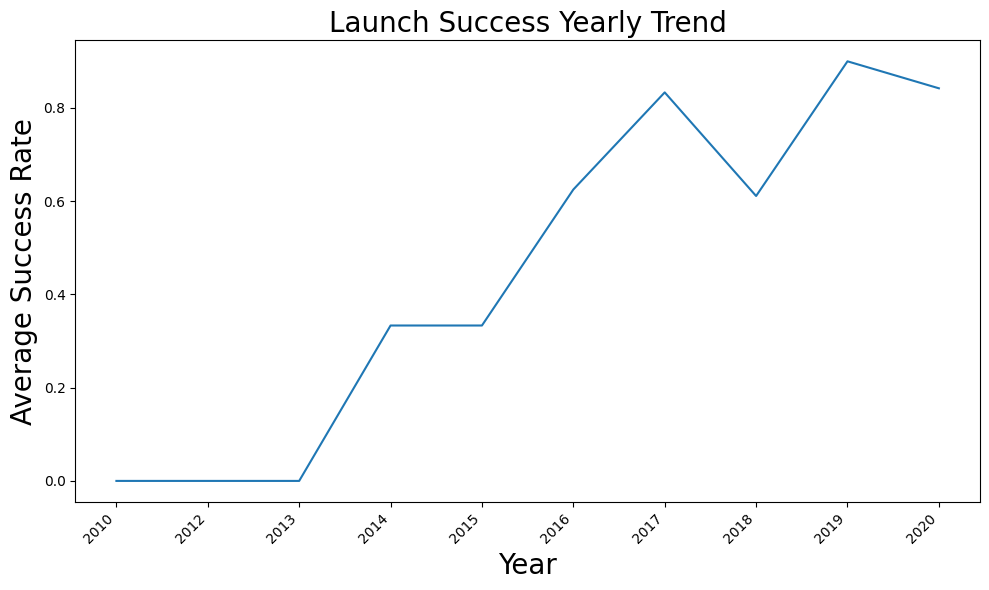

In [ ]:
# Calculate the average success rate for each year by grouping the DataFrame by 'Date' (year) and taking the mean of 'Class'
yearly_success_rate = df.groupby('Date')['Class'].mean()

# Create a figure with specific size
plt.figure(figsize=(10, 6))

# Plot a line chart with Year on the x-axis and Average Success Rate on the y-axis
sns.lineplot(x=yearly_success_rate.index, y=yearly_success_rate.values)

# Set x-axis label with larger font size
plt.xlabel("Year", fontsize=20)

# Set y-axis label with larger font size
plt.ylabel("Average Success Rate", fontsize=20)

# Set the title of the plot with larger font size
plt.title("Launch Success Yearly Trend", fontsize=20)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

### Launch Success Yearly Trend

This cell calculates and visualizes the average launch success rate for each year.

1. **Calculate Yearly Success Rate:** Groups the DataFrame by the 'Date' column (which now contains the year) and calculates the mean of the 'Class' column to get the average success rate for each year.
2. **Create Figure:** Sets up a figure for the plot with a specified size.
3. **Create Line Plot:** Generates a line chart with the year on the x-axis and the average success rate on the y-axis.
4. **Set Labels and Title:** Sets the labels for the x and y axes and the title of the plot with larger font sizes.
5. **Rotate x-axis labels:** Rotates the x-axis labels to improve readability.
6. **Adjust Layout:** Adjusts the plot layout to prevent labels from overlapping.
7. **Display Plot:** Shows the generated plot.

**Results and Insights:**

The line plot shows the trend of the average launch success rate over the years. It indicates a general upward trend in success rates from the early years of launches (2010-2013) to more recent years (2019-2020). There are some fluctuations, but the overall pattern suggests that SpaceX's launch success rate has improved significantly over time, likely due to technological advancements, increased experience, and refinement of their processes.

In [ ]:
# Select a subset of relevant features from the DataFrame for machine learning modeling
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights',
               'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]

# Display the first few rows of the selected features to verify
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### Feature Selection

This cell selects a subset of relevant features from the DataFrame to be used for machine learning modeling.

1. **Select Features:** Creates a new DataFrame `features` containing the columns 'FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', and 'Serial'. These columns are chosen as they are likely to be influential in predicting launch success.
2. **Display Head:** Displays the first few rows of the `features` DataFrame to verify the selection.

**Results and Insights:**

The output shows the first five rows of the `features` DataFrame, confirming that the selected columns have been successfully extracted. This step is crucial for preparing the data for machine learning algorithms, as it focuses the model on the most relevant information and reduces the dimensionality of the dataset by excluding less relevant columns.

In [ ]:
# Apply one-hot encoding to categorical columns to convert them into numerical format
# The columns encoded are 'Orbit', 'LaunchSite', 'LandingPad', and 'Serial'
# This ensures the dataset is ready for machine learning models
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the first few rows of the one-hot encoded DataFrame
display(features_one_hot.head())

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### One-Hot Encode Categorical Features

This cell applies one-hot encoding to the categorical columns in the `features` DataFrame.

1. **Apply One-Hot Encoding:** Uses `pd.get_dummies()` to convert the categorical columns ('Orbit', 'LaunchSite', 'LandingPad', and 'Serial') into numerical format. This creates new binary columns for each unique category within these columns.
2. **Display Head:** Displays the first few rows of the `features_one_hot` DataFrame to show the result of the one-hot encoding.

**Results and Insights:**

The output shows the first five rows of the `features_one_hot` DataFrame. The original categorical columns have been replaced by a larger number of new columns, where each new column represents a unique value from the original categorical columns. The values in these new columns are either 0 or 1, indicating the presence or absence of that category for each row. This transformation is essential for preparing the data for many machine learning algorithms that require numerical input. The increased number of columns reflects the expansion of the dataset due to the one-hot encoding process.

In [ ]:
# Convert all columns in the one-hot encoded DataFrame to float64 type
# This ensures compatibility with most machine learning algorithms that require numerical input
features_one_hot = features_one_hot.astype('float64')

# Display the data types of each column to verify the conversion
display(features_one_hot.dtypes)


,0
FlightNumber,float64
PayloadMass,float64
Flights,float64
GridFins,float64
Reused,float64
...,...
Serial_B1056,float64
Serial_B1058,float64
Serial_B1059,float64
Serial_B1060,float64


### Convert Data Types

This cell converts all columns in the one-hot encoded DataFrame to the `float64` data type.

1. **Convert Data Types:** Uses the `.astype('float64')` method to convert all columns in the `features_one_hot` DataFrame to floating-point numbers.
2. **Display Data Types:** Displays the data types of each column using the `.dtypes` attribute to verify the conversion.

**Results and Insights:**

The output shows the data types of each column in the `features_one_hot` DataFrame. All columns are now of the `float64` type. This conversion is important because many machine learning algorithms require numerical input, and floating-point numbers are a common format. Ensuring all relevant features are in a compatible numerical format is a necessary step before training a model.

In [ ]:
from google.colab import files

# Make sure your file is saved first
features_one_hot.to_csv('dataset_part_3.csv', index=False)

# Download the file
files.download('dataset_part_3.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>